### Exploratory Data Analysis Project - Customer Loans in Finance - Part 2: Analysis and Visualisation of Customer Loans Dataset

#### Introduction

This is part two of the Exploratory Data Analysis project into customer loans in finance.
Following part one's cleaning of the data, we will dive deeper into the dataset to identify any paterns or trends that will aid senior management in their business decisions.

The notebook is formatted in a report style with questions to be answered in markdown comments, followed by code and any appropriate visualisations.

#### 1. Necessary Imports and Instatiate Classes

Below are the necessary packages and classes required to run the code in this notebook:

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from data_visualisation_methods import Plotter
from dataframe_info_methods import DataFrameInfo
from db_utils import read_csv

# Instantiate the classes.
info_methods = DataFrameInfo
df_visuals = Plotter

#### 2. Loading the Dataset and Setting the Pandas Display Options

The csv file of the dataset cleaned in part one of the project will need to be saved to project  folder containing this notebook. Please see the GitHub README for full details.

In addition I suggest adjusting some of the display settings for pandas in order to visualise the results in a clearer way. 

In [ ]:
# Create a pandas dataframe from the loan data csv
loan_analysis_df = read_csv("loan_payments_nulls_removed.csv")

# Set pandas display to show all columns and rows, and avoid scientific notation for numeric values.
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.0f}'.format

#### 3. Initial Overview of the Dataset

Using pandas built in methods to have an initial overview of the dataset's columns and first 10 rows.

In [3]:
info_methods.df_info(loan_analysis_df)
loan_analysis_df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54100 entries, 0 to 54099
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          54100 non-null  int64  
 1   member_id                   54100 non-null  int64  
 2   loan_amount                 54100 non-null  int64  
 3   funded_amount_inv           54100 non-null  float64
 4   term                        54100 non-null  float64
 5   int_rate                    54100 non-null  float64
 6   instalment                  54100 non-null  float64
 7   grade                       54100 non-null  object 
 8   sub_grade                   54100 non-null  object 
 9   employment_length           54100 non-null  object 
 10  home_ownership              54100 non-null  object 
 11  annual_inc                  54100 non-null  float64
 12  verification_status         54100 non-null  object 
 13  issue_date                  541

,id,member_id,loan_amount,funded_amount_inv,term,int_rate,instalment,grade,sub_grade,employment_length,home_ownership,annual_inc,verification_status,issue_date,loan_status,payment_plan,purpose,dti,delinq_2yrs,earliest_credit_line,inq_last_6mths,open_accounts,total_accounts,out_prncp,out_prncp_inv,total_payment,total_payment_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,last_credit_pull_date,collections_12_mths_ex_med,policy_code,application_type
0,38676116,41461848,8000,8000,36,7,249,A,A4,5 years,MORTGAGE,46000,Not Verified,2021-01-01,Current,False,credit_card,20,2,1987-10-01,1,12,27,5530,5530,2983,2983,2470,512,0,0,0,2022-01-01,249,2022-01-01,0,1,INDIVIDUAL
1,38656203,41440010,13200,13200,36,7,408,A,A3,9 years,RENT,50000,Not Verified,2021-01-01,Current,False,credit_card,24,0,2001-09-01,0,15,31,9103,9103,4885,4885,4097,788,0,0,0,2022-01-01,408,2022-01-01,0,1,INDIVIDUAL
2,38656154,41439961,16000,16000,36,7,498,A,A4,8 years,MORTGAGE,73913,Source Verified,2021-01-01,Fully Paid,False,credit_card,17,0,1998-09-01,0,7,18,0,0,16825,16825,16000,825,0,0,0,2021-10-01,12850,2021-10-01,0,1,INDIVIDUAL
3,38656128,41439934,15000,15000,36,14,515,C,C4,1 year,RENT,42000,Source Verified,2021-01-01,Fully Paid,False,debt_consolidation,36,0,2008-06-01,0,6,13,0,0,15947,15947,15000,947,0,0,0,2021-06-01,13900,2021-06-01,0,1,INDIVIDUAL
4,38656121,41439927,15000,15000,36,6,457,A,A1,10+ years,MORTGAGE,145000,Verified,2021-01-01,Current,False,debt_consolidation,3,0,2002-04-01,1,23,50,10297,10297,5473,5473,4703,771,0,0,0,2022-01-01,457,2022-01-01,0,1,INDIVIDUAL
5,38656111,41439917,2525,2525,36,11,83,B,B4,< 1 year,OWN,32000,Source Verified,2021-01-01,Current,False,home_improvement,7,1,2011-03-01,0,3,4,1843,1843,914,914,682,231,0,0,0,2022-01-01,91,2022-01-01,0,1,INDIVIDUAL
6,38656110,41439916,6675,6675,36,22,255,E,E5,10+ years,RENT,13536,Verified,2021-01-01,Fully Paid,False,debt_consolidation,16,0,2006-11-01,2,3,4,0,0,6964,6964,6675,289,0,0,0,2021-03-01,6725,2021-03-01,0,1,INDIVIDUAL
7,38656067,41439872,26500,26200,60,20,702,E,E3,< 1 year,RENT,78000,Source Verified,2021-01-01,Charged Off,False,debt_consolidation,14,0,2001-03-01,0,10,37,0,0,4182,4135,1197,2985,0,0,0,2021-08-01,702,2022-01-01,0,1,INDIVIDUAL
8,38656063,41439868,10000,10000,60,13,227,C,C2,< 1 year,RENT,50048,Source Verified,2021-01-01,Current,False,credit_card,21,0,2005-11-01,0,8,11,8481,8481,2723,2723,1519,1203,0,0,0,2022-01-01,227,2022-01-01,0,1,INDIVIDUAL
9,38656052,41439857,10000,10000,36,8,314,A,A5,10+ years,MORTGAGE,103000,Not Verified,2021-01-01,Current,False,credit_card,16,0,2002-02-01,1,14,35,6935,6935,3766,3766,3065,701,0,0,0,2022-01-01,314,2022-01-01,0,1,INDIVIDUAL


#### 4. Analysis of Current State of the Loans

The following sections (4-8) answer questions posed by the business relating to current and future loan risk and losses. They are arranged in a Q&A format, with the answerings containing my process for tackling each question. 

Define Functions for this part of the analysis.

The below code initialises the functions used to apply various calculations to the dataset in order to answer questions posed by the business. 

In [4]:
# Define the function to calculate the total expected revenue for a loan.
def calculate_total_payments(loan):
    """Calculate the total expected revenue for a loan over its term.

    Args:
        loan (pd.Series): A single row from the DataFrame representing a loan. 
            Expected to contain the following keys:
            - 'term' (int or float): The length of the loan term (e.g., in months).
            - 'instalment' (int or float): The regular payment amount per period.

    Returns:
        float: The total expected revenue for the loan.
    """
    return loan['term'] * loan['instalment']

# Define a function to calculate the sum of a specified column in a DataFrame.
def column_sum(df, column):
    """Calculate the sum of all values in a specified column of a DataFrame.

    Args:
        df (pd.DataFrame): The DataFrame containing the data.
        column (str): The name of the column to sum.

    Returns:
        float: The sum of all values in the column.
    """
    total = df[column].sum()
    return total

# Define a function to calculate a percentage.
def calc_percent(part, whole):
    """Calculate the percentage of a part relative to a whole.

    Args:
        part (float): The numerator or the part value.
        whole (float): The denominator or the whole value.

    Returns:
        float: The percentage value.
    """
    percent = 100 * part / whole
    return percent

# Define a function to calculate the total outstanding amount for each loan.
def cal_total_outstanding(row):
    """Calculate the total outstanding amount for a loan.

    Args:
        row (pd.Series): A single row from the DataFrame representing a loan.
            Expected to contain the following keys:
            - 'total_owed_inc_int' (float): Total amount owed including interest.
            - 'total_payment' (float): Total payments made so far.

    Returns:
        float: The remaining outstanding amount for the loan.
    """
    return row['total_owed_inc_int'] - row['total_payment']

# Define a function to calculate the amount owed in the next 6 months for a loan.
def calculate_owed_in_6_months(row):
    """Calculate the amount owed in the next 6 months for a loan.

    The function takes into account loans that will be paid off before the
    6 months period is over.

    Args:
        row (pd.Series): A single row from the DataFrame representing a loan.
            Expected to contain the following keys:
            - 'out_total' (float): Current outstanding amount for the loan.
            - 'instalment' (float): The regular payment amount per period.

    Returns:
        float: The total amount owed in the next 6 months. If the loan is paid off
        during this period, only the remaining balance is included.
    """
    running_out_total = row['out_total']
    out_next_6_months = 0
    i = 1

    # Loop through the next 6 months, calculating payments.
    while i <= 6:
        out_next_6_months += row['instalment']
        running_out_total -= row['instalment']

        # Break if the loan is fully paid off.
        if running_out_total <= 0:
            break

        i += 1

    return out_next_6_months

##### Q1. Summarise what percentage of the loans have been currently recovered compared to the total amount to be paid over the loans term including interest.

To answer this question we will create a new column in the Dataframe containing the total expected revenue for each loan from its term and installment amounts, 'total_owned_inc_int'. 

And then calculate the total across all loans for the amount already recovered and take this as a percentage of the total expected revenues for all loans. 

In [5]:
# Add a new column to the DataFrame with the total expected revenue for each loan.
# This column represents the total amount owed for the full term, including interest.
loan_analysis_df['total_owed_inc_int'] = loan_analysis_df.apply(calculate_total_payments, axis=1)

# Calculate the percentage of the total expected revenue that has been recovered.
# This involves calculating the total expected revenue and the total amount recovered to date.
total_for_all_loans = column_sum(loan_analysis_df, 'total_owed_inc_int')
total_of_loans_recovered = column_sum(loan_analysis_df, 'total_payment')
percentage_of_loans_recovered = calc_percent(total_of_loans_recovered, total_for_all_loans)

# Print out the results.
print(f'Total expected revenue for all loans, inc interest: {"{:0,.0f}".format(total_for_all_loans)}')
print(f'Total amount recovered to date: {"{:0,.0f}".format(total_of_loans_recovered)}')
print(f'Percentage of total expected revenue that has been recovered to date: {round(percentage_of_loans_recovered, 2)}%')


Total expected revenue for all loans, inc interest: 939,746,418
Total amount recovered to date: 654,573,342
Percentage of total expected revenue that has been recovered to date: 69.65%


##### Q2. Calculate how much will be paid back in 6 months time with interest and visualise your results on an appropriate graph.

To do this we will calcaulte the total outstanding amount for each of the loans and add the resulst as a new column in the dataframe called 'out_totoa. 

Then filter for those with a Current loan status, and display the results on a bar plot. 

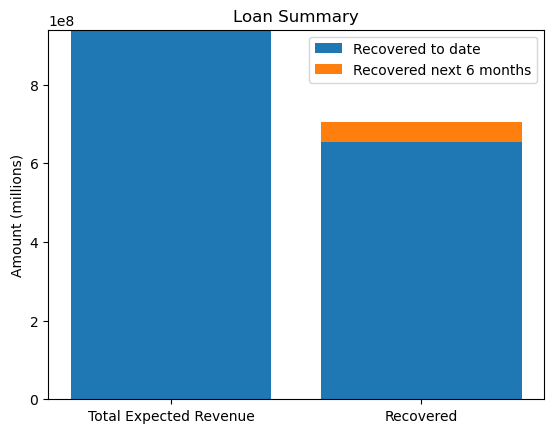

Total expected revenue for all loans, inc interest: 939,746,418
Total amount recovered to date: 654,573,342
Amount due to be paid back with interest in the next 6 months: 50,743,964


In [6]:
# Add a new column to the DataFrame with the outstanding amount for each loan.
# The 'out_total' column represents the remaining amount owed after subtracting payments made.
loan_analysis_df['out_total'] = loan_analysis_df.apply(cal_total_outstanding, axis=1)

# Filter the DataFrame for current loans only.
# The mask identifies loans with a status containing 'Current'.
current_loan_mask = loan_analysis_df['loan_status'].str.contains('Current')

# Apply the owed calculation to current loans and add a new column.
# The 'out_next_6_months' column shows the amount expected to be paid in the next 6 months.
loan_analysis_df['out_next_6_months'] = loan_analysis_df[current_loan_mask].apply(
    calculate_owed_in_6_months, axis=1
)

# Calculate the total amount due to be paid back in the next 6 months.
amount_due_6_months = loan_analysis_df['out_next_6_months'].sum()

# Visualize the above calculations on a bar graph.
# Data setup for the bar chart.
categories = ['Total Expected Revenue', 'Recovered']
data1 = [total_for_all_loans, total_of_loans_recovered]  # Baseline data.
data2 = [0, amount_due_6_months]  # Data for recovery in the next 6 months.

# Set up the plot.
fig, ax = plt.subplots()

# Create the bar chart. The second bar (data2) stacks on top of data1.
ax.bar(categories, data1, label='Recovered to date')
ax.bar(categories, data2, bottom=data1, label='Recovered next 6 months')

# Adjust y-axis formatting and labels.
ax.set_ylabel('Amount (millions)')  
ax.set_title('Loan Summary')  
ax.legend() 

plt.show()

# Print the calculations to support the data in the bar graph.
# These calculations provide context for the visualization.
print(f'Total expected revenue for all loans, inc interest: {"{:0,.0f}".format(total_for_all_loans)}')
print(f'Total amount recovered to date: {"{:0,.0f}".format(total_of_loans_recovered)}')
print(f'Amount due to be paid back with interest in the next 6 months: {"{:0,.0f}".format(amount_due_6_months)}')


#### 5. Calculating Loss

##### Q1. Calculate the percentage of charged off loans and the total amount that was paid towards these loans before being charged off.

The calculation uses a logical mask in pandas to filter out the loans with a Charged off status, and then displayed them as percentage of the total number of loans. 

And then calculates the total amount recovered before those loans were charged off. 

In [7]:
# Calculate the total number of loans in the dataset.
total_num_of_loans = len(loan_analysis_df)

# Using a logical mask to filter out and count the charged-off loans.
# 'Charged Off' refers to loans that have been written off as bad debts.
charged_off_df = loan_analysis_df[loan_analysis_df['loan_status'].str.contains('Charged Off')].reset_index()
num_charged_off = len(charged_off_df)

# Calculate the percentage of loans that are charged off.
percentage_charged_off = calc_percent(num_charged_off, total_num_of_loans)

# Calculate the total amount paid toward loans before they were charged off.
charged_off_repaid = column_sum(charged_off_df, 'total_payment')

# Printing the results.
print(f'The number of charged off loans: {num_charged_off}')
print(f'The percentage of loans that were charged off: {round(percentage_charged_off, 2)}%')
print(f'The amount already repaid for charged off loans: {'{:0,.0f}'.format(charged_off_repaid)}')


The number of charged off loans: 5853
The percentage of loans that were charged off: 10.82%
The amount already repaid for charged off loans: 39,092,575


#### 6. Calculating Projected Loss

##### Q1. Calculate the loss in revenue these loans would have generated for the company if they had finished their term. And visualise the loss projected over the remaining term of these loans.

Using the 'out_total' column we created early to calculate the loss in revenue for Charged Off Loans.



In [ ]:
# Calculates the outstanding total for charged off loans.
charged_off_out = column_sum(charged_off_df, 'out_total')
print(f'The amount lost in revenue from charged off loans: {'{:0,.0f}'.format(charged_off_out)}')

The amount lost in revenue from charged off loans: 68,718,416


To visualise the loss projected over the remaining term of the Charged Off loans, we will firstly calculate the monthly loss for each loan based on what would be its full term and then apply that to 

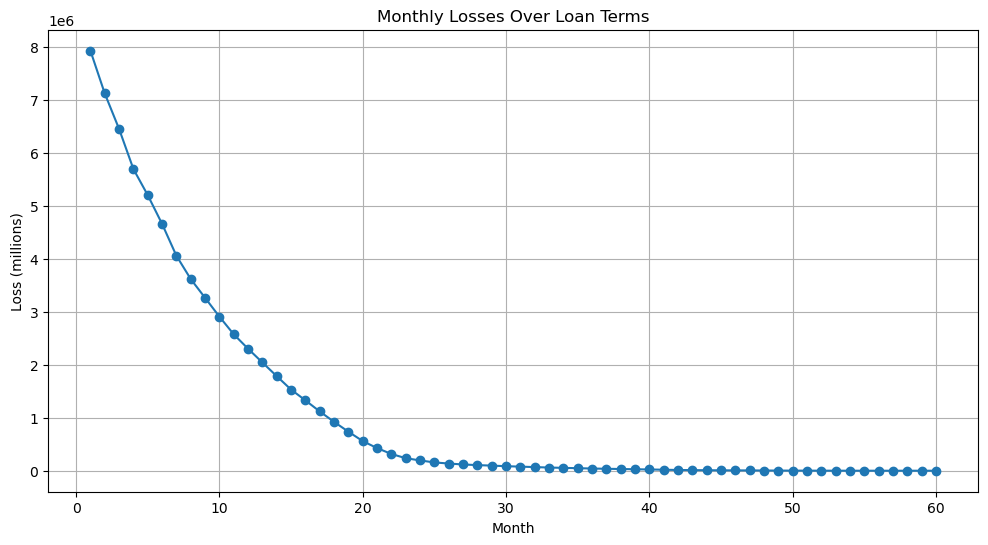

In [ ]:
# Calculate monthly loss for each loan.
# 'remaining_months' represents the estimated number of months left for each loan term.
charged_off_df['remaining_months'] = charged_off_df['term'] - (charged_off_df['out_total'] / charged_off_df['instalment'])
charged_off_df['remaining_months'] = charged_off_df['remaining_months'].astype(int)  # Convert remaining months to integers.
charged_off_df['monthly_loss'] = charged_off_df['out_total'] / charged_off_df['remaining_months']  # Loss per remaining month.

# Expand losses across months.
# For each loan, create a record of the monthly loss for all remaining months.
loss_data = []
for _, row in charged_off_df.iterrows():
    for month in range(1, row['remaining_months'] + 1):
        loss_data.append({
            'month': month,
            'loss': row['monthly_loss']
        })

# Create a new DataFrame from the expanded loss data.
# Each record corresponds to a monthly loss for a loan.
loan_loss_analysis_df = pd.DataFrame(loss_data)

# Aggregate total loss by month.
# The monthly_loss DataFrame contains the sum of all loan losses for each month.
monthly_loss = loan_loss_analysis_df.groupby('month')['loss'].sum().reset_index()

# Visualize the monthly loss on a line graph.
plt.figure(figsize=(12, 6)) 
plt.plot(monthly_loss['month'], monthly_loss['loss'], marker='o')  
plt.title('Monthly Losses Over Loan Terms') 
plt.xlabel('Month')  
plt.ylabel('Loss (millions)')  
plt.grid()  
plt.show()  

#### 7. Calculating Possible Loss

##### Q1. What percentage of loans are late on their payments?

Condisering all loans that have the below statuses are considered to be late:
- Late (16-30 days)
- Late (31-120 days)

We will group the data on the 'loan_status' column in order to count the number of late loans and show that fugure as a percentage of the total number of loans. 

In [10]:
# Calculate the number of late loans.
# Group the data on the 'loan_status' column and count the number for each status.
loan_status_group = loan_analysis_df.groupby('loan_status').count()
late_group = loan_status_group.loc[['Late (16-30 days)', 'Late (31-120 days)']]
num_of_late_loans = column_sum(late_group, 'policy_code') # Using 'policy_code' as a unique loan identifier.

# Calculate the percentage and print the result.
percentage_late = calc_percent(num_of_late_loans, total_num_of_loans)
print(f'The percentage of loans that are late: {round(percentage_late, 2)}%')

The percentage of loans that are late: 1.27%


##### Q2. Calculate the total amount of customers in this bracket and how much loss the company would incur if their status was changed to 'Charged Off'.

To calculate the loss incured by the late loans if they are charged off, we would create a late loans group, and subtract the 'total_payments' column from the 'loan amount' for each loan in this group, to give us the loss incurred from the amount loaned to the customer, and then total this up for all late loans. 

In [11]:
# Print the number of loans that are marked with a late status.
# 'num_of_late_loans' represents the total number of loans where the status is marked as late.
print(f'The number of customers whose loans are late: {num_of_late_loans}')

# Calculate the potential loss if late loans are charged off.
# Group the loans by their statuses and sum the relevant columns for calculations.
# This creates a grouped DataFrame with aggregated values for each loan status.
loan_status_payments_group = loan_analysis_df.groupby('loan_status')[
    ['loan_amount', 'total_payment', 'out_total', 'total_owed_inc_int']
].sum()

# Filter out the loans that are marked with a 'Late' status.
# Specifically, include loans that are late by 16-30 days and 31-120 days.
late_loans_df = loan_status_payments_group.loc[['Late (16-30 days)', 'Late (31-120 days)']]

# Calculate the potential loss by subtracting the total payments made from the total loan amounts.
late_loan_loss = column_sum(late_loans_df, 'loan_amount') - column_sum(late_loans_df, 'total_payment')

# Print the calculated loss for late loans if they are charged off.
print(f'Loss from charging off these late loans: {'{:0,.0f}'.format(late_loan_loss)}')


The number of customers whose loans are late: 686
Loss from charging off these late loans: 3,408,775


##### Q3. What is the projected loss of these loans if the customers were to finish the full loan term? 

Again we can use our 'out_total' column from earlier to calculate the projected loss compared to if the late loans were to finish their full loan term.

In [12]:
# Using the grouped Dataframe to calculate the oustanding total for all the late loans.
total_late_owed = column_sum(late_loans_df, 'out_total')
print(f'Projected loss of revenue for late loans being charged off: {'{:0,.0f}'.format(total_late_owed)}')

Projected loss of revenue for late loans being charged off: 7,519,025


##### Q4. If customers that are late on payments converted to Charged Off, what percentage of total expected revenue do these customers and the customers who have already defaulted and charged off on their loan represent?

To answer this question, we firstly calculate the total amount the company is expected to receive from the late loan group, and then show this amount, and the amount for customers who have aleady defaulted and charged off as a percentage of total expected revenue.  

In [13]:
# Calculate the total amount expected from late loans.
total_owed_late_loans = column_sum(late_loans_df, 'total_owed_inc_int')

# Calculate the percentage of total expected revenue represented by late loans.
percentage_total_late = calc_percent(total_owed_late_loans, total_for_all_loans)
print(f'The percentage of total expected revenue that late loans represent: {round(percentage_total_late, 2)}%')

# Filter loans that are in default or charged off.
# Includes loans marked as 'Charged Off', 'Does not meet the credit policy. Status:Charged Off', or 'Default'.
default_loans_df = loan_status_payments_group.loc[['Charged Off', 'Does not meet the credit policy. Status:Charged Off', 'Default']]

# Calculate the total amount expected from defaulted or charged-off loans.
total_owed_default_loans = column_sum(default_loans_df, 'total_owed_inc_int')

# Calculate the percentage of total expected revenue represented by defaulted or charged-off loans.
percentage_total_default = calc_percent(total_owed_default_loans, total_for_all_loans)

# Print the resulting percentage. 
print(f'The percentage of total expected revenue that defaulted and charged off loans represent: {round(percentage_total_default, 2)}%')

The percentage of total expected revenue that late loans represent: 1.53%
The percentage of total expected revenue that defaulted and charged off loans represent: 11.58%


#### 8. Indicators of Loss

Analyse the data to identify any possible indicators that will help identify customers who are unable to pay off their loans in the future.

Define functions required for this part of the analysis.

The below code defines the functions used to apply various calculations to analyse the dataset to provide any indicators of loss. 

In [14]:
class LoanComparison:
    """
    Perform loan status comparisons between categorical data variables and visualize data as bar plots.

    Attributes:
        df (pd.DataFrame): DataFrame containing the loan data.
        category_col (str): The name of the column containing categories (e.g., loan statuses).
        column2 (str): The name of the column to analyse (e.g., loan amounts).
        status1 (str): The first loan status to compare.
        status2 (str): The second loan status to compare.
    """

    def __init__(self, df, category_col, column2, status1, status2):
        """
        Initialize the LoanComparison class.

        Args:
            df (pd.DataFrame): DataFrame containing the data.
            category_col (str): The name of the column containing categories.
            column2 (str): The name of the column to analyse.
            status1 (str): The first loan status to compare.
            status2 (str): The second loan status to compare.
        """
        self.df = df
        self.category_col = category_col
        self.column2 = column2
        self.status1 = status1
        self.status2 = status2

    def calc_proportions_on_cat(self):
        """
        Calculate proportions of different categories within the category column.

        Raises:
            ValueError: If the specified loan statuses are not found in the DataFrame.
        """
        # Filter the data to include only the selected statuses.
        self.comparison_df = self.df[self.df[self.category_col].isin([self.status1, self.status2])]
        if self.comparison_df.empty:
            raise ValueError(f"No data found for statuses '{self.status1}' and '{self.status2}'.")

        # Group the data and calculate the proportions for each category.
        self.group_counts = self.comparison_df.groupby([self.category_col, self.column2]).size().reset_index(name='Count')
        loan_status_totals = self.group_counts.groupby(self.category_col)['Count'].transform('sum')
        self.group_counts['Proportion'] = self.group_counts['Count'] / loan_status_totals

    def barplot(self, x_fontsize):
        """
        Generate a bar plot comparing the proportions of a numerical variable
        between two loan statuses.

        Args:
            x_fontsize (int): Font size for the x-axis labels.

        Raises:
            ValueError: If the specified loan statuses are not found in the DataFrame.
        """
        self.calc_proportions_on_cat()

        # Define the order of the statuses for the bar plot.
        status_order = [self.status1, self.status2]

        # Plot the grouped data as a bar plot.
        plt.figure(figsize=(10, 6))
        sns.barplot(
            data=self.group_counts,
            x=self.column2,
            y='Proportion',
            hue=self.category_col,
            hue_order=status_order,
            palette='muted'
        )

        # Customize the plot for readability.
        plt.title(f'Comparison of loan {self.column2} between {self.status1} and {self.status2}', fontsize=16)
        plt.xlabel(f'{self.column2}', fontsize=14)
        plt.ylabel('Proportion', fontsize=14)
        plt.legend(title=self.category_col, fontsize=12, title_fontsize=13)
        plt.tight_layout()
        plt.xticks(fontsize=x_fontsize)

        # Display the plot.
        plt.show()


##### Categorical Data

Using the loans with a Fully Paid status as a baseline, first we compare some of the different categorical data variables between Fully Paid and Charged off statuses to see which might be best used to give an indication which loans are at a higher risk. We'll display the proportions of the categorical data for each of the below variables on a bar plot to help make observations.  

1. Loan Grading
2. Purpose of the loan
3. Home ownership status of the borrower
4. Verification status

1. Loan Grading

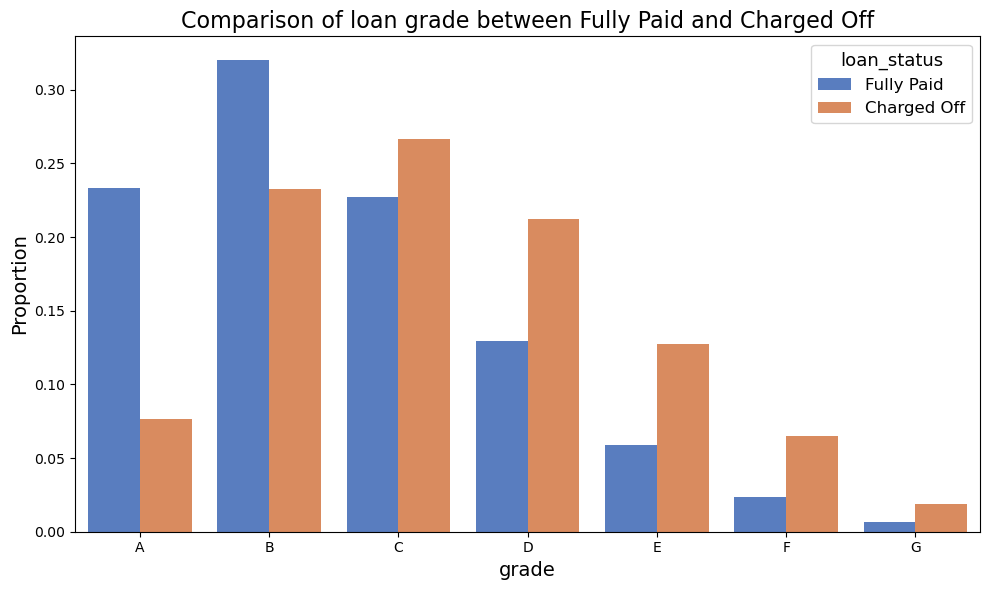

In [15]:
# Compare the loan statuss for loan grade.
grading_comp = LoanComparison(df=loan_analysis_df, category_col='loan_status', column2='grade', status1='Fully Paid', status2='Charged Off')
grading_comp.barplot(10) # pass the x-axis font size as an arguement 

Observations: 

As we can see, historically, lower grade loans make up a higher proportion of loans that are charged off when compared to loans that are fully paid. While some A grade loans do get charged off, the loans graded C - G start to significantly make up the proportion of loans that get charged off.

Let's see how these historical Charged Off loans compare with current loans that customers are late on their payments with to see if there are any similarities and conclusions we can draw. 

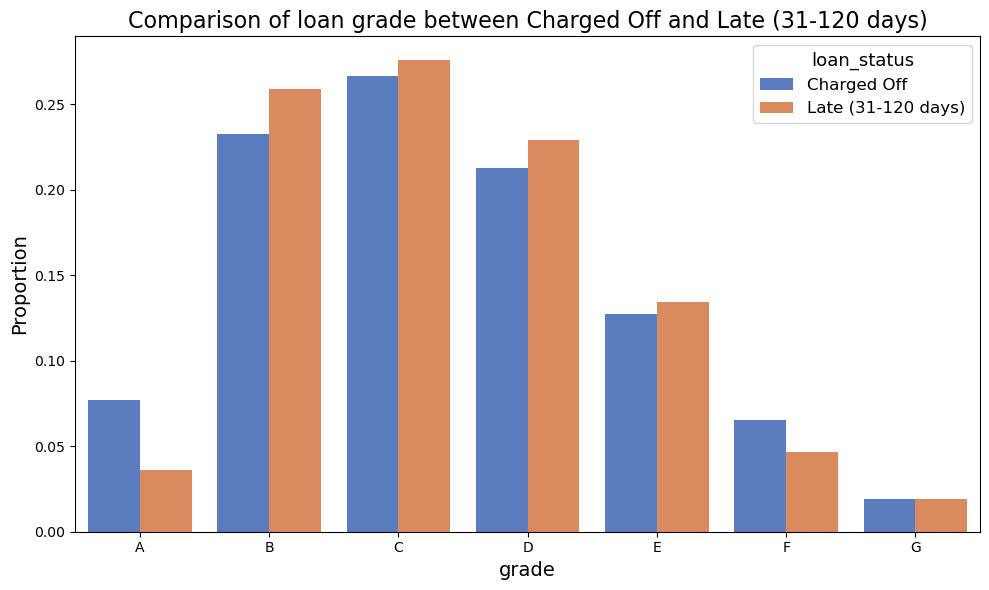

In [ ]:
# Compare the loan grade of those Charged off with loans that are Late (31-120 days).
grading_comp_late = LoanComparison(df=loan_analysis_df,
                                    category_col='loan_status',
                                    column2='grade',
                                    status1='Charged Off',
                                    status2='Late (31-120 days)'
                                    )
grading_comp_late.barplot(10)

Yes, clearly there is a correlation between the loan grades that are already Charged Off and the current late loans. So there is a high risk that the late loans from grades C - G will eventually be charged off. 

2. Loan Purpose: 

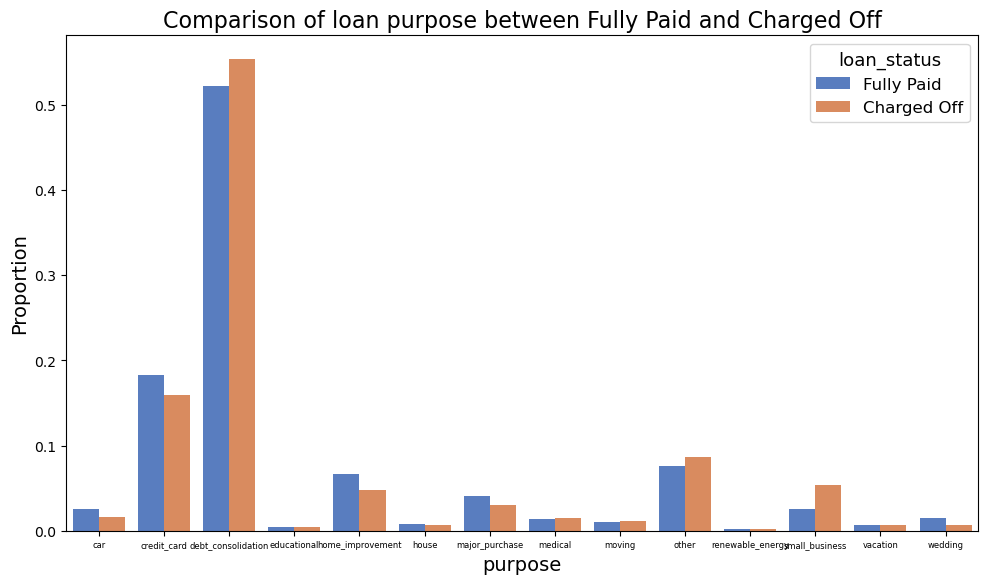

In [17]:
# Compare the loan statuss for loan purpose.
purpose_comp = LoanComparison(df=loan_analysis_df, category_col='loan_status', column2='purpose', status1='Fully Paid', status2='Charged Off')
purpose_comp.barplot(6)


The proportions between the Fully Paid and Charged Off loans are very similar, so there is no clear indicator which of the loan purpose might be at a higher risk of being charged off. 

3. Home Ownership

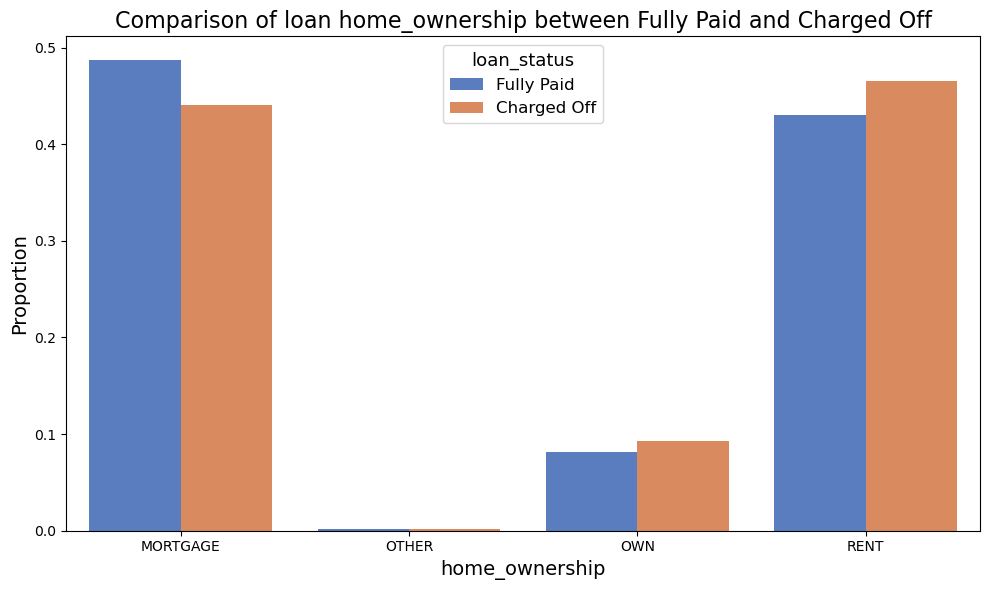

In [18]:
# Compare the loan statuss for home ownership status of the borrower.
home_own_comp = LoanComparison(df=loan_analysis_df, category_col='loan_status', column2='home_ownership', status1='Fully Paid', status2='Charged Off')
home_own_comp.barplot(10)

Again, the proportion of each category of home ownership is very similar between Fully Paid and Charged Off loans, so nothing there that stands out as an indicator of customers not being able to pay back their loans. 

4. Verification Status.

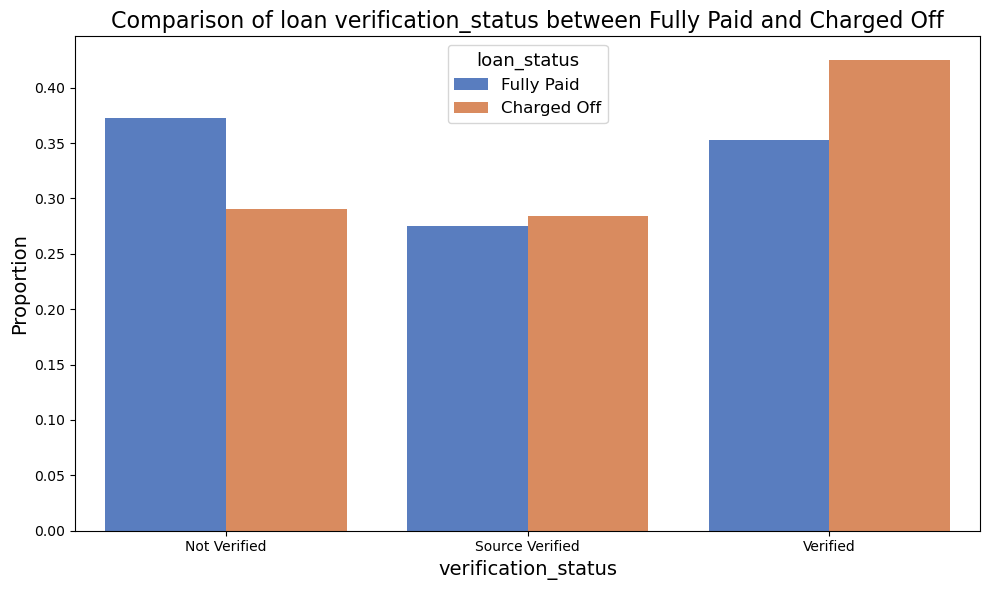

In [19]:
# Compare the loan statuss for loan verification status of the borrower.
verification_comp = LoanComparison(df=loan_analysis_df, category_col='loan_status', column2='verification_status', status1='Fully Paid', status2='Charged Off')
verification_comp.barplot(10)

And for verification status, there is no indicator of impact on ability to repay a loan as the proportions the differences are nominal. 

##### Continuous Data

Let's compare some of the continuous data values as well. 
We'll look at the following variables that might have an impact on loan repayments, and compare the Fully Paid and Charged Off loan statuses for each:
 - loan amount
 - annual income
 - dti ratio   
 - open_accounts

 The values have been normalised in order to visualise better any differences between the data variables. 

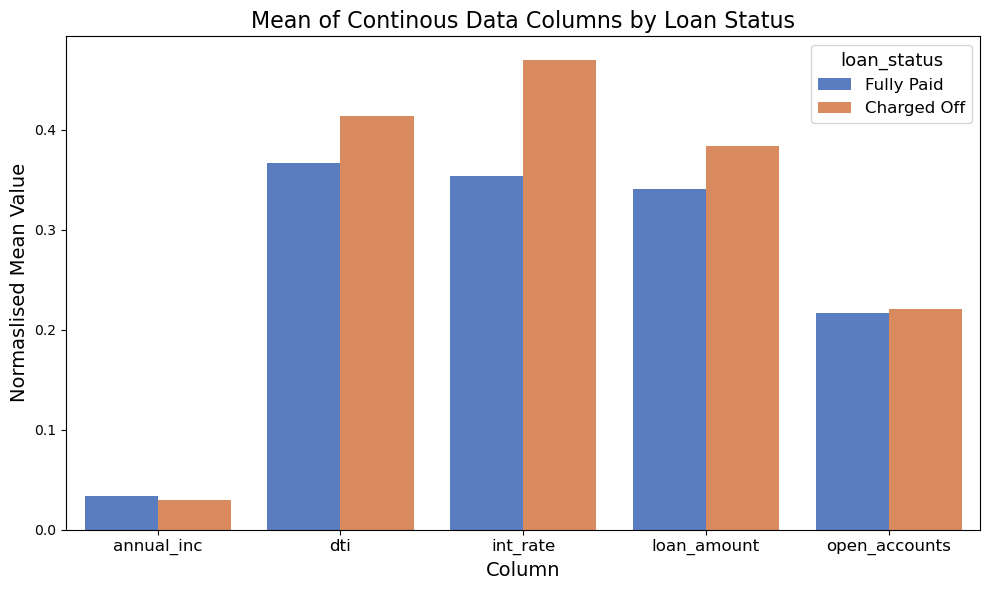

In [ ]:
# Create a class for the continous data comparison.
class ContinousDataComp:
    """
    Perform comparisons between variables containing continuous data and visualize data as bar plots.

    Attributes:
        df (pd.DataFrame): DataFrame containing the loan data.
        category_col (str): The name of the column containing categories (e.g., loan statuses).
        columns (list): List of columns to analyse (e.g., loan amounts).
        status1 (str): The first loan status to compare.
        status2 (str): The second loan status to compare.
    """
    def __init__(self, df, category_col, columns, status1, status2):
        """
        Initialize the class with a DataFrame, category column, list of columns, and two loan statuses to analyse.
        
        :param df: DataFrame containing the data
        :param category_col: The name of the column containing categories (default is 'Category')
        :param columns: List of column names (must be continuous variables) to plot
        :param status1: The first loan status to compare.
        :param status2: The second loan status to compare.
        """
        self.df = df
        self.category_col = category_col
        self.columns = columns
        self.status1 = status1
        self.status2 = status2

    def filter_data(self):
        """
        Filter the data to include only the selected categories.
        """
        self.filter_df = self.df.loc[self.df[self.category_col].isin([self.status1, self.status2])].copy()

    def reshape_data(self):
        """
        Reshape the data into a 'long' format for plotting.
        """
        self.df_melted = self.filter_df.melt(id_vars=[self.category_col], 
                                        value_vars=self.columns,
                                        var_name='Column', 
                                        value_name='Value')

    def normalize_data(self):
        """
        Normalize the continuous columns using Min-Max normalization.
        """
        
        for column in self.columns:
                min_val = self.filter_df[column].min()
                max_val = self.filter_df[column].max()
                self.filter_df[column] = (self.filter_df[column] - min_val) / (max_val - min_val)

    def plot(self):
        """
        Plot the bar chart comparing the means of the specified columns by category.
        """
        # Filter the data based on the selected categories
        self.filter_data()

        # Normalize the data if required
        self.normalize_data()

        # Reshape the data into long format
        self.reshape_data()

        # Calculate the mean for each group and column
        mean_df = self.df_melted.groupby([self.category_col, 'Column']).mean().reset_index()

        # Set the order of the loan status
        status_order = [self.status1, self.status2]

        # Create the bar plot
        plt.figure(figsize=(10, 6))
        sns.barplot(
            data=mean_df,
            x='Column',
            y='Value',
            hue=self.category_col,
            hue_order=status_order,
            palette='muted')

        # Customize the plot
        plt.title('Mean of Continous Data Columns by Loan Status', fontsize=16)
        plt.xlabel('Column', fontsize=14)
        plt.ylabel('Normaslised Mean Value', fontsize=14)
        plt.xticks(fontsize=12)
        plt.legend(title=self.category_col, fontsize=12, title_fontsize=13)
        plt.tight_layout()

        # Show the plot
        plt.show()

# Create the graph using the ContinuousDataComp class for four of the variables from the dataset. 
loan_mean_comp = ContinousDataComp(df=loan_analysis_df, category_col='loan_status', columns=['loan_amount', 'int_rate', 'annual_inc', 'dti', 'open_accounts'], status1='Fully Paid', status2='Charged Off')
loan_mean_comp.plot()

Observations:

The main takeaway for me is that interest rate sticks out as having an average increased mean for charged off loans compared to those that are Fully Paid. This could be because riskier loans will generally have higher interest rates.  So it is worth exploring further how interest rate might affect whether a loan is defaulted or not and ask the question, do higher interest rates lead to more defaults for high risk loans when compared to loans with lower interest rates?

##### Do higher interest rates lead to more defaults for high risk loans when compared to loans with lower interest rates?

First, let's look at the 'int_rate' column in more detail. 

By checking the descriptive analyse of the 'int_rate' column, we see that the mean and median are the same. Therefore we can start by splitting the interest rates into a high and low value groups based on the mean to analyse each to see what impact they have on loan defaults/charged off. 

We'll name these groups Low Interest Rates and High Interest Rate. Then, for each group, we'll look at the percentage of Fully Paid to Charged off loans for each of the loan grades. We then display each of the low and high interest rate groups on a bar plot and compare the two.

In [21]:
# Checking mean and median for interest rates across the dataset. 
info_methods.describe_col(loan_analysis_df, 'int_rate')

# Calculate the mean for the int_rate column.
int_rate_mean = loan_analysis_df['int_rate'].mean()

count   54100
mean       14
std         4
min         5
25%        11
50%        14
75%        16
max        26
Name: int_rate, dtype: float64


In [22]:
# Create a new class to anaylse the data and display the results.
class CatDataComp:
    """
    Perform comparisons within categorical data variables and visualize data as bar plots.

    Attributes:
        df (pd.DataFrame): DataFrame containing the loan data.
        category_col (str): The name of the column containing categories (e.g., loan statuses).
        column2 (str): The name of the column to analyse (e.g., loan amounts).
        status1 (str): The first loan status to compare.
        status2 (str): The second loan status to compare.
    """

    def __init__(self, df, category_col, column2, status1, status2, int_rate):
        """
        Initialize the LoanComparison class.

        Args:
            df (pd.DataFrame): DataFrame containing the data.
            category_col (str): The name of the column containing categories.
            column2 (str): The name of the column to analyse.
            status1 (str): The first loan status to compare.
            status2 (str): The second loan status to compare.
        """
        self.df = df
        self.category_col = category_col
        self.column2 = column2
        self.status1 = status1
        self.status2 = status2
        self.int_rate = int_rate

    def cal_prop_column(self):
        """
        Calculates the proportions within each category on a column.

        Raises:
            ValueError: If the specified loan statuses are not found in the DataFrame.
        """
        # Filter the data to include only the selected statuses.
        self.comparison_df = self.df[self.df[self.category_col].isin([self.status1, self.status2])]
        if self.comparison_df.empty:
            raise ValueError(f"No data found for statuses '{self.status1}' and '{self.status2}'.")

        # Group the data and calculate the proportions between each of the categories in the column we are analysing.
        self.group_counts = self.comparison_df.groupby([self.column2, self.category_col]).size().reset_index(name='Count')
        loan_status_totals = self.group_counts.groupby(self.column2)['Count'].transform('sum')
        self.group_counts['Proportion'] = self.group_counts['Count'] / loan_status_totals

    def barplot(self, x_fontsize):
        """
        Generate a bar plot comparing the proportions of a numerical variable
        between two loan statuses.

        Args:
            x_fontsize (int): Font size for the x-axis labels.
        """
        # Calculate proportions for each category in the column.
        self.cal_prop_column()

        # Define the order of the statuses for the bar plot.
        status_order = [self.status1, self.status2]

        # Plot the grouped data as a bar plot.
        plt.figure(figsize=(10, 6))
        sns.barplot(
            data=self.group_counts,
            x=self.column2,
            y='Proportion',
            hue=self.category_col,
            hue_order=status_order,
            palette='muted'
        )

        # Customize the plot for readability.
        plt.title(f'Comparison of {self.column2} between {self.status1} and {self.status2} loans with {self.int_rate}', fontsize=15)
        plt.xlabel(f'{self.column2}', fontsize=14)
        plt.ylabel('Proportion of Loans for each Grade', fontsize=14)
        plt.legend(title=self.category_col, fontsize=12, title_fontsize=13)
        plt.tight_layout()
        plt.xticks(fontsize=x_fontsize)

        # Display the plot.
        plt.show()

def assign_int_rate_group(row):
    """
    Assign loans to an interest rate group split around the mean value.
    
    Args:
        row (pd.Series): A single row from the DataFrame representing a loan.
            Expected to contain the following key:
            - 'int_rate' (float): The interest rate of the loan.

    Returns:
        str: The name of the interest rate group per loan.
    """
    if row['int_rate'] < int_rate_mean:
        return 'Low Interest Rate'
    else:
        return 'High Interest Rate'

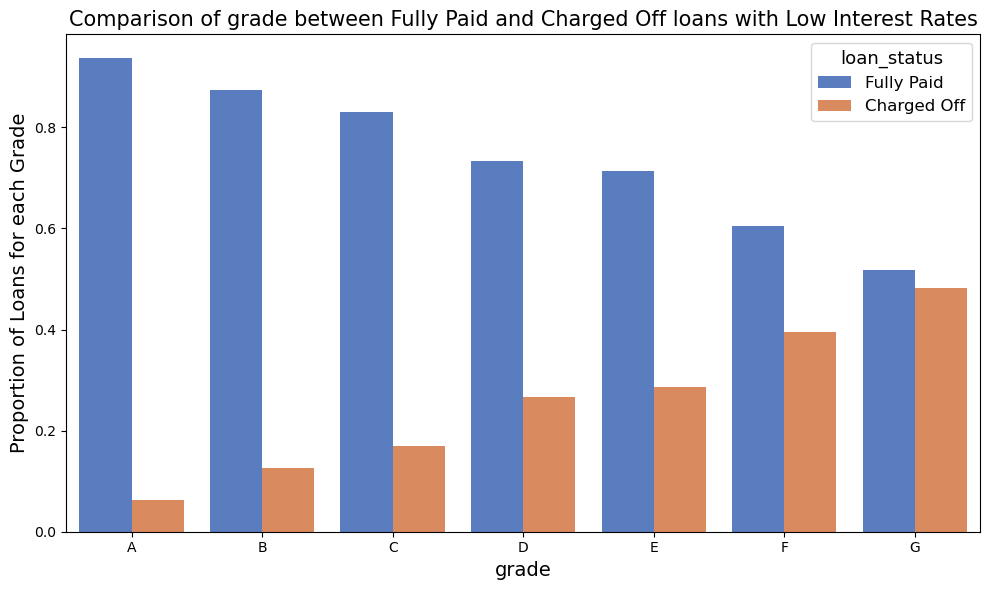

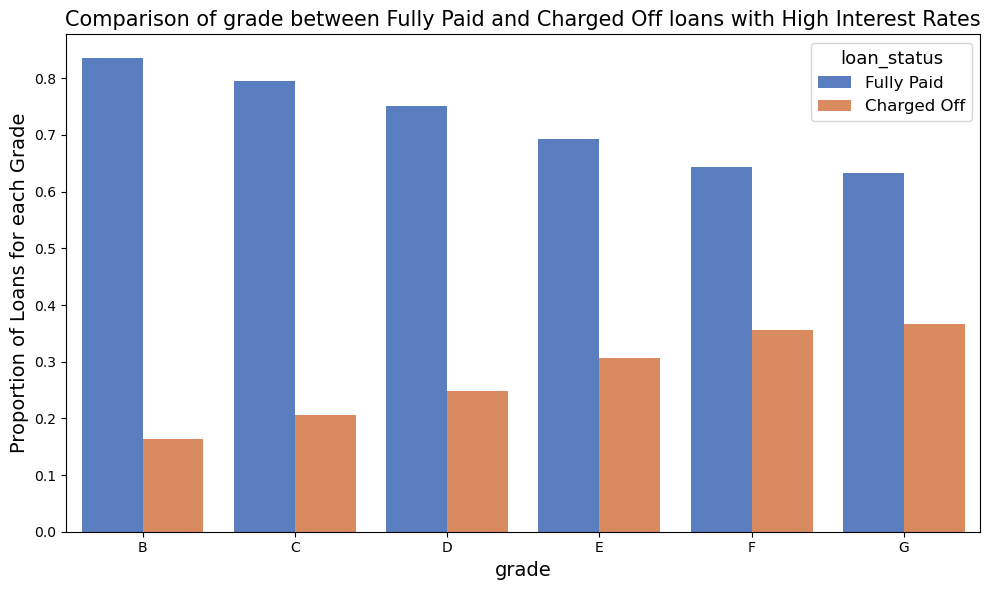

In [23]:
# Apply the assign_int_rate_group function to the DataFrame.
loan_analysis_df['int_rate_measure'] = loan_analysis_df.apply(assign_int_rate_group, axis=1)

# Filter each interest rate group into its own DataFrame
low_int_rates = loan_analysis_df.loc[loan_analysis_df['int_rate_measure'] == 'Low Interest Rate']
high_int_rates = loan_analysis_df.loc[loan_analysis_df['int_rate_measure'] == 'High Interest Rate']

# Caculcate the proportions for each loan grade and visualise on two box plots.
low_rate_comp = CatDataComp(
                        df=low_int_rates, 
                        category_col='loan_status', 
                        column2='grade', 
                        status1='Fully Paid', 
                        status2='Charged Off', 
                        int_rate='Low Interest Rates'
                    )
low_rate_comp.barplot(10)

high_rate_comp = CatDataComp(
                        df=high_int_rates,
                        category_col='loan_status', 
                        column2='grade', 
                        status1='Fully Paid', 
                        status2='Charged Off', 
                        int_rate='High Interest Rates'
                    )
high_rate_comp.barplot(10)


Observations: 

Looking at some of the lower loan grades D - G, there is, in general, little difference in proportion of loans charged off between the low and high risk rates. 

In fact for F and G graded loans the lower interest rates make up a higher percentage than higher interests. 

So, to answer the question, do higher interest rates lead to more defaults for high risk loans, I would say it has little effect when compared to the grade of the loan itself, where we can see, in both cases, the higher grades, as a proportion of all completed loans, are more likely to default than the lower risk graded loans.  

##### Conclusions on Indicators of Loss

In conclusion, the loan grade has the biggest impact on whether a loan is charged off. As this grading can take in several factors such as credit scores, financial stability, loan purpose, and industry conditions, it is a solid indicator to use. 

While on initial insepction there appeared to be a higher average interest rate associated with loans that get charged off compared to fully paid loans, however, after further analysis, the interest rate variable follows the same trend as loan grading, and therefore not an accurate indicator if a customer might default on a loan. 
